In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

# Missing Values
# Set display options to show more columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read the CSV file
df = pd.read_csv('df_3.csv')

# Replace 'Unavailable' and 'unknown' values with NaN
df = df.replace('Unavailable', pd.NA)
df = df.replace('Unknown', pd.NA)

# Calculate the number of missing values in each column
null_counts = df.isna().sum()

# Output the number of missing values for each column
print(null_counts)
print(len(null_counts))

Country                                                        0
Index_score                                                    0
Due_Diligence_Reponse                                          0
Legal_framework_score                                          0
Enforcement_score                                              0
Outcome_score                                                  0
Country Numeric Iso Code                                       0
Country Iso Code                                               2
Sector                                                         0
Good                                                           0
Exploitation_Type                                              0
Year Added                                                     0
Year Removed                                                  91
Region                                                         0
Region Id                                                      0
Year                     

In [2]:

# Get the total number of rows
total_rows = len(df)

# Find columns with less than 2% missing values
columns_with_few_nulls = null_counts[null_counts / total_rows < 0.02].index
print(len(columns_with_few_nulls))

# Create a new DataFrame containing only columns with less than 2% missing values, and remove unnecessary columns
new_df = df[columns_with_few_nulls]
new_null_counts = new_df.isna().sum()
print(new_null_counts)



55
Country                                             0
Index_score                                         0
Due_Diligence_Reponse                               0
Legal_framework_score                               0
Enforcement_score                                   0
Outcome_score                                       0
Country Numeric Iso Code                            0
Country Iso Code                                    2
Sector                                              0
Good                                                0
Exploitation_Type                                   0
Year Added                                          0
Region                                              0
Region Id                                           0
Year                                                0
Summary Paragraph                                   0
Assessment_Level                                    0
Assessment Level Id                                 0
Age Range Of Working Chil

In [3]:
columns_to_drop = [
    "Country Iso Code",
    "Region",
    "Year",
    "Summary Paragraph",
    "Assessment_Level"
]

new_df = new_df.drop(columns=columns_to_drop)
new_df.to_csv('new_df.csv', index=False)


In [4]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 50 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country                                           483 non-null    object 
 1   Index_score                                       483 non-null    float64
 2   Due_Diligence_Reponse                             483 non-null    object 
 3   Legal_framework_score                             483 non-null    float64
 4   Enforcement_score                                 483 non-null    float64
 5   Outcome_score                                     483 non-null    float64
 6   Country Numeric Iso Code                          483 non-null    float64
 7   Sector                                            483 non-null    object 
 8   Good                                              483 non-null    object 
 9   Exploitation_Type    

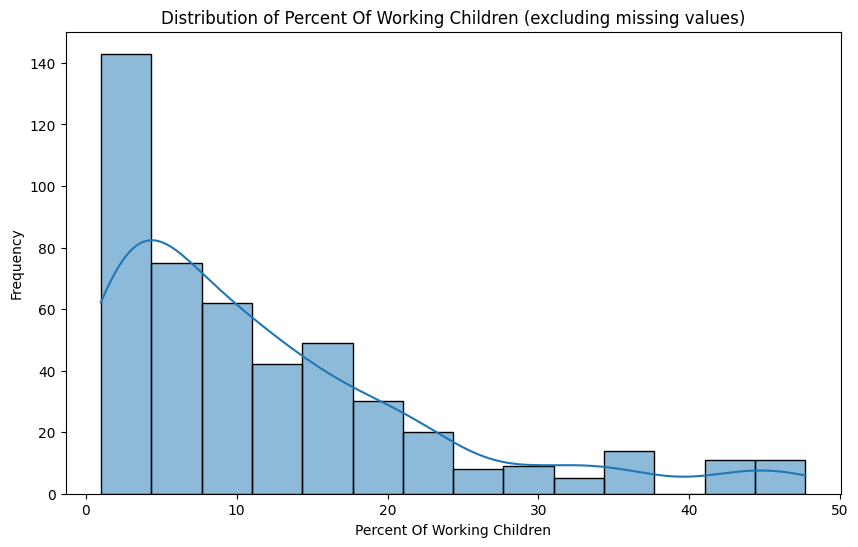

Mean: 12.230062630480166
Median: 9.2
The distribution is significantly skewed. Consider using median for imputation.


In [5]:
# Convert 'Percent Of Working Children' column to numeric type
new_df['Percent Of Working Children'] = pd.to_numeric(new_df['Percent Of Working Children'], errors='coerce')

# Remove missing values
cleaned_data = new_df['Percent Of Working Children'].dropna()

# Plot histogram and Kernel Density Estimate (KDE) to view the distribution
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data, kde=True)
plt.title('Distribution of Percent Of Working Children (excluding missing values)')
plt.xlabel('Percent Of Working Children')
plt.ylabel('Frequency')
plt.show()

# Calculate mean and median
mean_value = cleaned_data.mean()
median_value = cleaned_data.median()

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

# Decide which value to use for imputation
if cleaned_data.skew() > 1 or cleaned_data.skew() < -1:
    print("The distribution is significantly skewed. Consider using median for imputation.")
    imputed_value = median_value
else:
    print("The distribution is not significantly skewed. Consider using mean for imputation.")
    imputed_value = mean_value

# Impute using the selected value
new_df['Percent Of Working Children'] = new_df['Percent Of Working Children'].fillna(imputed_value)



In [6]:
# Check the unique values in each column of new_df
unique_values_in_columns = {column: new_df[column].unique() for column in new_df.columns}
unique_values_in_columns


{'Country': array(['Afghanistan', 'Angola', 'Argentina', 'Azerbaijan', 'Bangladesh',
        'Belize', 'Benin', 'Bolivia', 'Brazil', 'Burkina Faso', 'Cambodia',
        'Cameroon', 'Central African Republic', 'Chad', 'Colombia',
        'Costa Rica', 'Dominican Republic',
        'Democratic Republic of the Congo', 'Ecuador', 'Egypt',
        'El Salvador', 'Ethiopia', 'Ghana', 'Guatemala', 'Guinea',
        'Honduras', 'India', 'Indonesia', 'Jordan', 'Kazakhstan', 'Kenya',
        'Lebanon', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
        'Mauritania', 'Mexico', 'Mongolia', 'Mozambique', 'Namibia',
        'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Panama',
        'Paraguay', 'Peru', 'Philippines', 'Rwanda', 'Senegal',
        'Sierra Leone', 'South Sudan', 'Suriname', 'Tanzania', 'Thailand',
        'Uganda', 'Ukraine', 'Uzbekistan', 'Yemen', 'Zambia', 'Zimbabwe'],
       dtype=object),
 'Index_score': array([6.2, 6.6, 4.1, 3.6, 5.9, 3.8, 5.7, 5. , 3.7, 6.4

In [7]:
# Find columns with only one unique value
columns_with_single_value = []
for column in new_df.columns:
    if len(new_df[column].unique()) == 1:
        columns_with_single_value.append(column)
print(columns_with_single_value)

# Delete these columns
new_df.drop(columns=columns_with_single_value, inplace=True)

# Display the processed DataFrame to confirm the columns have been correctly removed
new_df.head()

['Ilo C 182 Ratified', 'Crc Ratified', 'Minimum Work Is Calculated Age', 'Minimum Hazardous Work Is Calculated Age', 'Minimum Compulsory Military Age', 'Minimum Compulsory Military Is Calculated', 'Minumum Voluntary Military Is Calculated', 'Minumum Non State Military Is Calculated', 'Compulsory Education Is Calculated', 'Enforcement Criminal Criminal Refresher Courses']


,Country,Index_score,Due_Diligence_Reponse,Legal_framework_score,Enforcement_score,Outcome_score,Country Numeric Iso Code,Sector,Good,Exploitation_Type,Year Added,Region Id,Assessment Level Id,Age Range Of Working Children,Percent Of Working Children,Percent Of Working Children Agriculture,Percent Of Working Children Industry,Percent Of Working Children Services,Age Range Of Children Attending School,Age Range Of Children Working And Studying,Crc Csec Ratified,Crc Ac Ratified,Palermo Ratified,Minimum Work Conforms Standard,Minimum Work Age,Minimum Hazardous Work Conforms Standard,Minimum Hazardous Work Age,Identification Of Hazardous Occupations List,Prohibition Forced Labor Conforms Standard,Prohibition Child Trafficking Conforms Standard,Prohibition Csec Conforms Standard,Prohibition Illicit Activities Conforms Standard,Minumum Voluntary Military Age,Compulsory Education Conforms Standard,Compulsory Education Age,Free Public Education Conforms Standard,Enforcement Labor Authorized Assess Penalties,Coordination,Policy,Program
0,Afghanistan,6.2,Enhanced,2.8,7.21,7.37,4.0,Manufacturing,Bricks,FCL,2011.0,1.0,51.0,5 to 14,12.0,91.8,1.2,7.0,5 to 14,7 to 14,Yes,Yes,Yes,No,18,Yes,18,Yes,No,Yes,No,Yes,18,Yes,15,Yes,No,Yes,Yes,Yes
1,Afghanistan,6.2,Enhanced,2.8,7.21,7.37,4.0,Manufacturing,Carpets,CL,2009.0,1.0,51.0,5 to 14,12.0,91.8,1.2,7.0,5 to 14,7 to 14,Yes,Yes,Yes,No,18,Yes,18,Yes,No,Yes,No,Yes,18,Yes,15,Yes,No,Yes,Yes,Yes
2,Afghanistan,6.2,Enhanced,2.8,7.21,7.37,4.0,Agriculture,Poppies,CL,2009.0,1.0,51.0,5 to 14,12.0,91.8,1.2,7.0,5 to 14,7 to 14,Yes,Yes,Yes,No,18,Yes,18,Yes,No,Yes,No,Yes,18,Yes,15,Yes,No,Yes,Yes,Yes
3,Afghanistan,6.2,Enhanced,2.8,7.21,7.37,4.0,Mining,Coal,CL,2012.0,1.0,51.0,5 to 14,12.0,91.8,1.2,7.0,5 to 14,7 to 14,Yes,Yes,Yes,No,18,Yes,18,Yes,No,Yes,No,Yes,18,Yes,15,Yes,No,Yes,Yes,Yes
4,Afghanistan,6.2,Enhanced,2.8,7.21,7.37,4.0,Mining,Salt,CL,2018.0,1.0,51.0,5 to 14,12.0,91.8,1.2,7.0,5 to 14,7 to 14,Yes,Yes,Yes,No,18,Yes,18,Yes,No,Yes,No,Yes,18,Yes,15,Yes,No,Yes,Yes,Yes


In [8]:
# Special handling for some anomalous data
columns_to_clean = ['Enforcement Labor Authorized Assess Penalties', 'Coordination']
for column in columns_to_clean:
    # Strip whitespace, fill missing values with 'No', and replace empty strings with 'No'
    new_df[column] = new_df[column].str.strip().fillna('No').replace({'': 'No'})

# '13-Dec' should be '13', likely a recording error
new_df['Compulsory Education Age'] = new_df['Compulsory Education Age'].replace('13-Dec', '13')
# Convert the 'Compulsory Education Age' column to integer
new_df['Compulsory Education Age'] = new_df['Compulsory Education Age'].astype(int)

# Check the unique values in each column of new_df after cleaning
unique_values_in_columns = {column: new_df[column].unique() for column in new_df.columns}
unique_values_in_columns


{'Country': array(['Afghanistan', 'Angola', 'Argentina', 'Azerbaijan', 'Bangladesh',
        'Belize', 'Benin', 'Bolivia', 'Brazil', 'Burkina Faso', 'Cambodia',
        'Cameroon', 'Central African Republic', 'Chad', 'Colombia',
        'Costa Rica', 'Dominican Republic',
        'Democratic Republic of the Congo', 'Ecuador', 'Egypt',
        'El Salvador', 'Ethiopia', 'Ghana', 'Guatemala', 'Guinea',
        'Honduras', 'India', 'Indonesia', 'Jordan', 'Kazakhstan', 'Kenya',
        'Lebanon', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
        'Mauritania', 'Mexico', 'Mongolia', 'Mozambique', 'Namibia',
        'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Panama',
        'Paraguay', 'Peru', 'Philippines', 'Rwanda', 'Senegal',
        'Sierra Leone', 'South Sudan', 'Suriname', 'Tanzania', 'Thailand',
        'Uganda', 'Ukraine', 'Uzbekistan', 'Yemen', 'Zambia', 'Zimbabwe'],
       dtype=object),
 'Index_score': array([6.2, 6.6, 4.1, 3.6, 5.9, 3.8, 5.7, 5. , 3.7, 6.4

In [9]:
# Convert specified columns to integer type
integer_columns = [
    'Country Numeric Iso Code',
    'Year Added',
    'Region Id',
    'Assessment Level Id',
    'Minimum Work Age',
    'Minimum Hazardous Work Age',
    'Minumum Voluntary Military Age',
    'Compulsory Education Age'
]

for column in integer_columns:
    # Convert columns to numeric type first to handle any non-numeric entries and then to 'Int64' to allow for NA values
    new_df[column] = pd.to_numeric(new_df[column], errors='coerce').astype('Int64')

# Check the unique values in each column of new_df after conversion
unique_values_in_columns = {column: new_df[column].unique() for column in new_df.columns}
unique_values_in_columns


{'Country': array(['Afghanistan', 'Angola', 'Argentina', 'Azerbaijan', 'Bangladesh',
        'Belize', 'Benin', 'Bolivia', 'Brazil', 'Burkina Faso', 'Cambodia',
        'Cameroon', 'Central African Republic', 'Chad', 'Colombia',
        'Costa Rica', 'Dominican Republic',
        'Democratic Republic of the Congo', 'Ecuador', 'Egypt',
        'El Salvador', 'Ethiopia', 'Ghana', 'Guatemala', 'Guinea',
        'Honduras', 'India', 'Indonesia', 'Jordan', 'Kazakhstan', 'Kenya',
        'Lebanon', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
        'Mauritania', 'Mexico', 'Mongolia', 'Mozambique', 'Namibia',
        'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Panama',
        'Paraguay', 'Peru', 'Philippines', 'Rwanda', 'Senegal',
        'Sierra Leone', 'South Sudan', 'Suriname', 'Tanzania', 'Thailand',
        'Uganda', 'Ukraine', 'Uzbekistan', 'Yemen', 'Zambia', 'Zimbabwe'],
       dtype=object),
 'Index_score': array([6.2, 6.6, 4.1, 3.6, 5.9, 3.8, 5.7, 5. , 3.7, 6.4

In [10]:
# Binary variables encoding
binary_columns = [
    'Crc Csec Ratified',
    'Crc Ac Ratified',
    'Palermo Ratified',
    'Minimum Work Conforms Standard',
    'Minimum Hazardous Work Conforms Standard',
    'Identification Of Hazardous Occupations List',
    'Prohibition Forced Labor Conforms Standard',
    'Prohibition Child Trafficking Conforms Standard',
    'Prohibition Csec Conforms Standard',
    'Prohibition Illicit Activities Conforms Standard',
    'Compulsory Education Conforms Standard',
    'Free Public Education Conforms Standard',
    'Enforcement Labor Authorized Assess Penalties',
    'Coordination',
    'Policy',
    'Program'
]

for column in binary_columns:
    # Replace 'Yes' with 1 and 'No' with 0, then convert to integer
    new_df[column] = new_df[column].replace({'Yes': 1, 'No': 0}).astype(int)

# Check the unique values in each column of new_df after binary encoding
unique_values_in_columns = {column: new_df[column].unique() for column in new_df.columns}
unique_values_in_columns


{'Country': array(['Afghanistan', 'Angola', 'Argentina', 'Azerbaijan', 'Bangladesh',
        'Belize', 'Benin', 'Bolivia', 'Brazil', 'Burkina Faso', 'Cambodia',
        'Cameroon', 'Central African Republic', 'Chad', 'Colombia',
        'Costa Rica', 'Dominican Republic',
        'Democratic Republic of the Congo', 'Ecuador', 'Egypt',
        'El Salvador', 'Ethiopia', 'Ghana', 'Guatemala', 'Guinea',
        'Honduras', 'India', 'Indonesia', 'Jordan', 'Kazakhstan', 'Kenya',
        'Lebanon', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
        'Mauritania', 'Mexico', 'Mongolia', 'Mozambique', 'Namibia',
        'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Panama',
        'Paraguay', 'Peru', 'Philippines', 'Rwanda', 'Senegal',
        'Sierra Leone', 'South Sudan', 'Suriname', 'Tanzania', 'Thailand',
        'Uganda', 'Ukraine', 'Uzbekistan', 'Yemen', 'Zambia', 'Zimbabwe'],
       dtype=object),
 'Index_score': array([6.2, 6.6, 4.1, 3.6, 5.9, 3.8, 5.7, 5. , 3.7, 6.4

In [11]:
# Encoding age range variables: using the lower limit of the age range for encoding
age_range_mapping = {'5 to 14': 5, '6 to 14': 6, '7 to 14': 7, '10 to 14': 10}
new_df['Age Range Of Children Attending School'] = new_df['Age Range Of Children Attending School'].map(age_range_mapping)
new_df['Age Range Of Children Working And Studying'] = new_df['Age Range Of Children Working And Studying'].map(age_range_mapping)
new_df['Age Range Of Working Children'] = new_df['Age Range Of Working Children'].map(age_range_mapping)

# Exploitation type encoding: 'DER', 'CL', 'FL', 'FCL' represent different severity levels of exploitation
# Assuming higher numbers indicate more severe exploitation
exploitation_type_mapping = {'DER': 0, 'CL': 1, 'FL': 0, 'FCL': 2}
new_df['Exploitation_Type'] = new_df['Exploitation_Type'].map(exploitation_type_mapping)

# Due diligence response encoding should reflect the level of response
# Assuming higher numbers indicate higher levels of response
due_diligence_response_mapping = {'Basic': 1, 'Heightened': 2, 'Enhanced': 3}
new_df['Due_Diligence_Reponse'] = new_df['Due_Diligence_Reponse'].map(due_diligence_response_mapping)

# Display the head of the DataFrame to confirm changes
new_df.head()


,Country,Index_score,Due_Diligence_Reponse,Legal_framework_score,Enforcement_score,Outcome_score,Country Numeric Iso Code,Sector,Good,Exploitation_Type,Year Added,Region Id,Assessment Level Id,Age Range Of Working Children,Percent Of Working Children,Percent Of Working Children Agriculture,Percent Of Working Children Industry,Percent Of Working Children Services,Age Range Of Children Attending School,Age Range Of Children Working And Studying,Crc Csec Ratified,Crc Ac Ratified,Palermo Ratified,Minimum Work Conforms Standard,Minimum Work Age,Minimum Hazardous Work Conforms Standard,Minimum Hazardous Work Age,Identification Of Hazardous Occupations List,Prohibition Forced Labor Conforms Standard,Prohibition Child Trafficking Conforms Standard,Prohibition Csec Conforms Standard,Prohibition Illicit Activities Conforms Standard,Minumum Voluntary Military Age,Compulsory Education Conforms Standard,Compulsory Education Age,Free Public Education Conforms Standard,Enforcement Labor Authorized Assess Penalties,Coordination,Policy,Program
0,Afghanistan,6.2,3,2.8,7.21,7.37,4,Manufacturing,Bricks,2,2011,1,51,5,12.0,91.8,1.2,7.0,5,7,1,1,1,0,18,1,18,1,0,1,0,1,18,1,15,1,0,1,1,1
1,Afghanistan,6.2,3,2.8,7.21,7.37,4,Manufacturing,Carpets,1,2009,1,51,5,12.0,91.8,1.2,7.0,5,7,1,1,1,0,18,1,18,1,0,1,0,1,18,1,15,1,0,1,1,1
2,Afghanistan,6.2,3,2.8,7.21,7.37,4,Agriculture,Poppies,1,2009,1,51,5,12.0,91.8,1.2,7.0,5,7,1,1,1,0,18,1,18,1,0,1,0,1,18,1,15,1,0,1,1,1
3,Afghanistan,6.2,3,2.8,7.21,7.37,4,Mining,Coal,1,2012,1,51,5,12.0,91.8,1.2,7.0,5,7,1,1,1,0,18,1,18,1,0,1,0,1,18,1,15,1,0,1,1,1
4,Afghanistan,6.2,3,2.8,7.21,7.37,4,Mining,Salt,1,2018,1,51,5,12.0,91.8,1.2,7.0,5,7,1,1,1,0,18,1,18,1,0,1,0,1,18,1,15,1,0,1,1,1


In [12]:
# Perform one-hot encoding on categorical features
categorical_columns = ['Sector', 'Good']
new_df = pd.get_dummies(new_df, columns=categorical_columns)

# Display the first few rows of the DataFrame to confirm changes
new_df.head()


,Country,Index_score,Due_Diligence_Reponse,Legal_framework_score,Enforcement_score,Outcome_score,Country Numeric Iso Code,Exploitation_Type,Year Added,Region Id,Assessment Level Id,Age Range Of Working Children,Percent Of Working Children,Percent Of Working Children Agriculture,Percent Of Working Children Industry,Percent Of Working Children Services,Age Range Of Children Attending School,Age Range Of Children Working And Studying,Crc Csec Ratified,Crc Ac Ratified,Palermo Ratified,Minimum Work Conforms Standard,Minimum Work Age,Minimum Hazardous Work Conforms Standard,Minimum Hazardous Work Age,Identification Of Hazardous Occupations List,Prohibition Forced Labor Conforms Standard,Prohibition Child Trafficking Conforms Standard,Prohibition Csec Conforms Standard,Prohibition Illicit Activities Conforms Standard,Minumum Voluntary Military Age,Compulsory Education Conforms Standard,Compulsory Education Age,Free Public Education Conforms Standard,Enforcement Labor Authorized Assess Penalties,Coordination,Policy,Program,Sector_Agriculture,Sector_Manufacturing,Sector_Mining,Sector_Other,Good_Alcoholic Beverages,Good_Amber,Good_AÃÂ§aÃÂ­ Berries,Good_Baked Goods,Good_Bananas,Good_Beans,Good_Beans (green beans),Good_Beef,Good_Bidis (hand-rolled cigarettes),Good_Blueberries,Good_Bovines,Good_Brassware,Good_Brazil Nuts/Chestnuts,Good_Bricks,Good_Bricks (clay),Good_Broccoli,Good_Cabbages,Good_Carpets,Good_Carrots,Good_Cashews,Good_Cattle,Good_Ceramics,Good_Cereal Grains,Good_Charcoal,Good_Chile Peppers,Good_Citrus Fruits,Good_Cloves,Good_Coal,Good_Cobalt ore (heterogenite),Good_Coca (stimulant plant),Good_Cocoa,Good_Coconuts,Good_Coffee,Good_Copper,Good_Corn,Good_Cotton,Good_Cottonseed (hybrid),Good_Crude Palm Kernel Oil,Good_Crude Palm Oil,Good_Cucumbers,Good_Dairy Products,Good_Diamonds,Good_Dried Fish,Good_Eggplants,Good_Electronics,Good_Embellished Textiles,Good_Emeralds,Good_Fashion Accessories,Good_Fireworks,Good_Fish,Good_Flowers,Good_Fluorspar (mineral),Good_Footwear,Good_Footwear (sandals),Good_Fruits (Pome and Stone),Good_Furniture,Good_Garlic,Good_Garments,Good_Gems,Good_Glass,Good_Glass Bangles,Good_Goats,Good_Gold,Good_Granite,Good_Granite (crushed),Good_Grapes,Good_Gravel (crushed stones),Good_Gypsum (mineral),Good_Hogs,Good_Incense (agarbatti),Good_Jute (textiles),Good_Khat (stimulant),Good_Khat/Miraa (stimulant plant),Good_Leather,Good_Leather Goods/Accessories,Good_Lettuce,Good_Lobsters,Good_Locks,Good_Manioc/Cassava,Good_Matches,Good_Meat,Good_Melons,Good_Mica,Good_Nile Perch (fish),Good_Oleochemicals,Good_Olives,Good_Onions,Good_Palm Fruit,Good_Peanuts,Good_Peppers,Good_Pineapples,Good_Poppies,Good_Pornography,Good_Potatoes,Good_Poultry,Good_Pyrotechnics,Good_Refined Palm Kernel Oil,Good_Refined Palm Oil,Good_Rice,Good_Rubber,Good_Salt,Good_Sand,Good_Sandstone,Good_Sapphires,Good_Sesame,Good_Sheep,Good_Shellfish,Good_Shrimp,Good_Silk Cocoons,Good_Silk Fabric,Good_Silk Thread,Good_Silver,Good_Sisal,Good_Soap,Good_Soccer Balls,Good_Stones,Good_Stones (limestone),Good_Stones (pumice),Good_Strawberries,Good_Sugarcane,Good_Surgical Instruments,Good_Sweet Potatoes,Good_Tantalum ore (coltan),Good_Tanzanite (gems),Good_Tea,Good_Textiles,Good_Textiles (hand-woven),Good_Thread/Yarn,Good_Tilapia (fish),Good_Timber,Good_Tin,Good_Tin ore (cassiterite),Good_Tobacco,Good_Tomatoes,Good_Trona (mineral),Good_Tungsten ore (wolframite),Good_Vanilla,Good_Wheat,Good_Yerba Mate (stimulant plant),Good_Zinc
0,Afghanistan,6.2,3,2.8,7.21,7.37,4,2,2011,1,51,5,12.0,91.8,1.2,7.0,5,7,1,1,1,0,18,1,18,1,0,1,0,1,18,1,15,1,0,1,1,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [13]:
unique_values_in_columns = {column: new_df[column].unique() for column in new_df.columns}
unique_values_in_columns

{'Country': array(['Afghanistan', 'Angola', 'Argentina', 'Azerbaijan', 'Bangladesh',
        'Belize', 'Benin', 'Bolivia', 'Brazil', 'Burkina Faso', 'Cambodia',
        'Cameroon', 'Central African Republic', 'Chad', 'Colombia',
        'Costa Rica', 'Dominican Republic',
        'Democratic Republic of the Congo', 'Ecuador', 'Egypt',
        'El Salvador', 'Ethiopia', 'Ghana', 'Guatemala', 'Guinea',
        'Honduras', 'India', 'Indonesia', 'Jordan', 'Kazakhstan', 'Kenya',
        'Lebanon', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
        'Mauritania', 'Mexico', 'Mongolia', 'Mozambique', 'Namibia',
        'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Panama',
        'Paraguay', 'Peru', 'Philippines', 'Rwanda', 'Senegal',
        'Sierra Leone', 'South Sudan', 'Suriname', 'Tanzania', 'Thailand',
        'Uganda', 'Ukraine', 'Uzbekistan', 'Yemen', 'Zambia', 'Zimbabwe'],
       dtype=object),
 'Index_score': array([6.2, 6.6, 4.1, 3.6, 5.9, 3.8, 5.7, 5. , 3.7, 6.4

In [14]:
# Check for missing values in the data
null_values = new_df.isnull().sum()
print(null_values[null_values > 0])


Series([], dtype: int64)


In [15]:
# Encoding True/False Binary Columns
new_df[new_df.columns[1:]] = new_df[new_df.columns[1:]].astype('int')

new_df.head()

,Country,Index_score,Due_Diligence_Reponse,Legal_framework_score,Enforcement_score,Outcome_score,Country Numeric Iso Code,Exploitation_Type,Year Added,Region Id,Assessment Level Id,Age Range Of Working Children,Percent Of Working Children,Percent Of Working Children Agriculture,Percent Of Working Children Industry,Percent Of Working Children Services,Age Range Of Children Attending School,Age Range Of Children Working And Studying,Crc Csec Ratified,Crc Ac Ratified,Palermo Ratified,Minimum Work Conforms Standard,Minimum Work Age,Minimum Hazardous Work Conforms Standard,Minimum Hazardous Work Age,Identification Of Hazardous Occupations List,Prohibition Forced Labor Conforms Standard,Prohibition Child Trafficking Conforms Standard,Prohibition Csec Conforms Standard,Prohibition Illicit Activities Conforms Standard,Minumum Voluntary Military Age,Compulsory Education Conforms Standard,Compulsory Education Age,Free Public Education Conforms Standard,Enforcement Labor Authorized Assess Penalties,Coordination,Policy,Program,Sector_Agriculture,Sector_Manufacturing,Sector_Mining,Sector_Other,Good_Alcoholic Beverages,Good_Amber,Good_AÃÂ§aÃÂ­ Berries,Good_Baked Goods,Good_Bananas,Good_Beans,Good_Beans (green beans),Good_Beef,Good_Bidis (hand-rolled cigarettes),Good_Blueberries,Good_Bovines,Good_Brassware,Good_Brazil Nuts/Chestnuts,Good_Bricks,Good_Bricks (clay),Good_Broccoli,Good_Cabbages,Good_Carpets,Good_Carrots,Good_Cashews,Good_Cattle,Good_Ceramics,Good_Cereal Grains,Good_Charcoal,Good_Chile Peppers,Good_Citrus Fruits,Good_Cloves,Good_Coal,Good_Cobalt ore (heterogenite),Good_Coca (stimulant plant),Good_Cocoa,Good_Coconuts,Good_Coffee,Good_Copper,Good_Corn,Good_Cotton,Good_Cottonseed (hybrid),Good_Crude Palm Kernel Oil,Good_Crude Palm Oil,Good_Cucumbers,Good_Dairy Products,Good_Diamonds,Good_Dried Fish,Good_Eggplants,Good_Electronics,Good_Embellished Textiles,Good_Emeralds,Good_Fashion Accessories,Good_Fireworks,Good_Fish,Good_Flowers,Good_Fluorspar (mineral),Good_Footwear,Good_Footwear (sandals),Good_Fruits (Pome and Stone),Good_Furniture,Good_Garlic,Good_Garments,Good_Gems,Good_Glass,Good_Glass Bangles,Good_Goats,Good_Gold,Good_Granite,Good_Granite (crushed),Good_Grapes,Good_Gravel (crushed stones),Good_Gypsum (mineral),Good_Hogs,Good_Incense (agarbatti),Good_Jute (textiles),Good_Khat (stimulant),Good_Khat/Miraa (stimulant plant),Good_Leather,Good_Leather Goods/Accessories,Good_Lettuce,Good_Lobsters,Good_Locks,Good_Manioc/Cassava,Good_Matches,Good_Meat,Good_Melons,Good_Mica,Good_Nile Perch (fish),Good_Oleochemicals,Good_Olives,Good_Onions,Good_Palm Fruit,Good_Peanuts,Good_Peppers,Good_Pineapples,Good_Poppies,Good_Pornography,Good_Potatoes,Good_Poultry,Good_Pyrotechnics,Good_Refined Palm Kernel Oil,Good_Refined Palm Oil,Good_Rice,Good_Rubber,Good_Salt,Good_Sand,Good_Sandstone,Good_Sapphires,Good_Sesame,Good_Sheep,Good_Shellfish,Good_Shrimp,Good_Silk Cocoons,Good_Silk Fabric,Good_Silk Thread,Good_Silver,Good_Sisal,Good_Soap,Good_Soccer Balls,Good_Stones,Good_Stones (limestone),Good_Stones (pumice),Good_Strawberries,Good_Sugarcane,Good_Surgical Instruments,Good_Sweet Potatoes,Good_Tantalum ore (coltan),Good_Tanzanite (gems),Good_Tea,Good_Textiles,Good_Textiles (hand-woven),Good_Thread/Yarn,Good_Tilapia (fish),Good_Timber,Good_Tin,Good_Tin ore (cassiterite),Good_Tobacco,Good_Tomatoes,Good_Trona (mineral),Good_Tungsten ore (wolframite),Good_Vanilla,Good_Wheat,Good_Yerba Mate (stimulant plant),Good_Zinc
0,Afghanistan,6,3,2,7,7,4,2,2011,1,51,5,12,91,1,7,5,7,1,1,1,0,18,1,18,1,0,1,0,1,18,1,15,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Afghanistan,6,3,2,7,7,4,1,2009,1,51,5,12,91,1,7,5,7,1,1,1,0,18,1,18,1,0,1,0,1,18,1,15,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [16]:
from scipy.stats import chi2_contingency, f_oneway

continuous_features  = ['Index_score', 'Legal_framework_score', 'Enforcement_score', 'Outcome_score',
                        'Percent Of Working Children',
                   'Percent Of Working Children Agriculture',
                   'Percent Of Working Children Industry',
                   'Percent Of Working Children Services']


categorical_features =  [x for x in new_df.drop(columns=['Exploitation_Type', 'Country']).columns if x not in continuous_features]

# List to store significant columns
significant_columns = []

# Catgeorical Feature Selection
for column in categorical_features:

    # Contingency table for Chi-square test
    contingency_table = pd.crosstab(new_df[column], new_df['Exploitation_Type'])

    # Perform Chi-square test
    chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

    # Reject Columns that aren't significant
    if p_val < 0.1:
        significant_columns.append(column)


# Continuous Feature selection
for column in continuous_features:
    # Perform ANOVA test
    f_stat, p_val_anova = f_oneway(new_df[new_df['Exploitation_Type'] == 0][column], new_df[new_df['Exploitation_Type'] == 1][column], new_df[new_df['Exploitation_Type'] == 2][column])

    # Reject Columns that aren't significant
    if p_val_anova < 0.1:
        significant_columns.append(column)


In [17]:
significant_columns

['Country Numeric Iso Code',
 'Year Added',
 'Region Id',
 'Minimum Work Age',
 'Minimum Hazardous Work Age',
 'Prohibition Child Trafficking Conforms Standard',
 'Prohibition Illicit Activities Conforms Standard',
 'Minumum Voluntary Military Age',
 'Good_Brazil Nuts/Chestnuts',
 'Good_Carpets',
 'Good_Crude Palm Kernel Oil',
 'Good_Crude Palm Oil',
 'Good_Embellished Textiles',
 'Good_Garments',
 'Good_Oleochemicals',
 'Good_Refined Palm Kernel Oil',
 'Good_Refined Palm Oil',
 'Good_Silk Cocoons',
 'Good_Timber',
 'Good_Wheat',
 'Index_score',
 'Legal_framework_score',
 'Enforcement_score']

In [18]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

x = new_df[significant_columns]
y = new_df['Exploitation_Type']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Perform Oversampling
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train,y_train)

# Train the ordinal logistic regression model
ordinal_logistic = LogisticRegression(solver='saga', max_iter=5000, C=0.1, multi_class='multinomial')
ordinal_logistic.fit(x_train_resampled, y_train_resampled)

# Test the model
y_pred_log = ordinal_logistic.predict(x_test)


# Evaluation
f1_test = f1_score(y_test, y_pred_log, average='weighted')
print("Ordinal Logistic Regression Test F1:", f1_test)



Ordinal Logistic Regression Test F1: 0.669042711111411


In [19]:
#Weights
coefficients = ordinal_logistic.coef_
print(coefficients)

bias =  ordinal_logistic.intercept_
print(bias)

[[ 1.72514822e-04  1.27419110e-03 -5.67219052e-02 -3.49586472e-02
  -1.45635107e-02 -4.53620298e-02  3.91778862e-03 -4.27366993e-02
   1.37837467e-03  1.11677728e-03  1.17133582e-03  1.17338746e-03
  -2.97251299e-04  1.83400318e-03  1.17193568e-03  1.17213825e-03
   1.17349571e-03  1.37896111e-03  7.53890440e-04  1.24752147e-03
  -6.28206953e-02 -6.42541410e-03 -1.03267188e-01]
 [ 9.30883958e-04 -2.57999591e-03  1.13945431e-01  1.85937706e-01
   3.79640398e-02  8.31964639e-02  4.69912814e-02  5.55413557e-02
  -3.79434402e-04  3.99031710e-03 -5.11725751e-04 -5.13315430e-04
   8.73455920e-04  2.04563071e-03 -5.12208555e-04 -5.12130115e-04
  -5.13386418e-04 -1.06433816e-03  8.21263348e-04 -5.87356481e-04
  -7.73301491e-03  2.21617138e-02 -4.49534195e-03]
 [-1.10339878e-03  1.30580480e-03 -5.72235255e-02 -1.50979058e-01
  -2.34005292e-02 -3.78344340e-02 -5.09090701e-02 -1.28046565e-02
  -9.98940268e-04 -5.10709438e-03 -6.59610071e-04 -6.60072028e-04
  -5.76204621e-04 -3.87963389e-03 -6.597

In [20]:
# Each Country Risk Score

country_risk_probabilities = ordinal_logistic.predict_proba(x)
country_risk_score = np.dot(country_risk_probabilities, [0,1,2] )

probabilities =  [(country, probability) for country, probability in zip(new_df['Country'], country_risk_probabilities)]

risks = [(country, risk) for country, risk in zip(new_df['Country'], country_risk_score)]

# Sort Lists

probability_sorted =sorted(probabilities, key=lambda x: x[0])
risk_sorted= sorted(risks, key=lambda x: x[0])


print("Probabilities: \n", probability_sorted)

print("Risks: \n", risk_sorted)

Probabilities: 
 [('Afghanistan', array([0.23852337, 0.34334396, 0.41813267])), ('Afghanistan', array([0.23827748, 0.34663878, 0.41508373])), ('Afghanistan', array([0.2378976 , 0.34509308, 0.41700932])), ('Afghanistan', array([0.23883566, 0.34247099, 0.41869335])), ('Afghanistan', array([0.24070094, 0.33725571, 0.42204335])), ('Afghanistan', array([0.23852337, 0.34334396, 0.41813267])), ('Afghanistan', array([0.2378976 , 0.34509308, 0.41700932])), ('Angola', array([0.21142607, 0.22011852, 0.56845541])), ('Angola', array([0.21142607, 0.22011852, 0.56845541])), ('Argentina', array([0.28943808, 0.40113865, 0.30942327])), ('Argentina', array([0.28943808, 0.40113865, 0.30942327])), ('Argentina', array([0.28943808, 0.40113865, 0.30942327])), ('Argentina', array([0.28943808, 0.40113865, 0.30942327])), ('Argentina', array([0.28992457, 0.40189793, 0.3081775 ])), ('Argentina', array([0.28943808, 0.40113865, 0.30942327])), ('Argentina', array([0.28943808, 0.40113865, 0.30942327])), ('Argentina', 

In [21]:
for i in probability_sorted:
    print(i[0] + ':', i[1])

Afghanistan: [0.23852337 0.34334396 0.41813267]
Afghanistan: [0.23827748 0.34663878 0.41508373]
Afghanistan: [0.2378976  0.34509308 0.41700932]
Afghanistan: [0.23883566 0.34247099 0.41869335]
Afghanistan: [0.24070094 0.33725571 0.42204335]
Afghanistan: [0.23852337 0.34334396 0.41813267]
Afghanistan: [0.2378976  0.34509308 0.41700932]
Angola: [0.21142607 0.22011852 0.56845541]
Angola: [0.21142607 0.22011852 0.56845541]
Argentina: [0.28943808 0.40113865 0.30942327]
Argentina: [0.28943808 0.40113865 0.30942327]
Argentina: [0.28943808 0.40113865 0.30942327]
Argentina: [0.28943808 0.40113865 0.30942327]
Argentina: [0.28992457 0.40189793 0.3081775 ]
Argentina: [0.28943808 0.40113865 0.30942327]
Argentina: [0.28943808 0.40113865 0.30942327]
Argentina: [0.28943808 0.40113865 0.30942327]
Argentina: [0.28943808 0.40113865 0.30942327]
Argentina: [0.28943808 0.40113865 0.30942327]
Argentina: [0.28943808 0.40113865 0.30942327]
Argentina: [0.28992457 0.40189793 0.3081775 ]
Argentina: [0.28992457 0.4

In [22]:
for i in risk_sorted:
    print(i[0] + ':', i[1])

Afghanistan: 1.1796092981257913
Afghanistan: 1.17680625108719
Afghanistan: 1.1791117235471447
Afghanistan: 1.1798576892657073
Afghanistan: 1.1813424080379424
Afghanistan: 1.1796092981257913
Afghanistan: 1.1791117235471447
Angola: 1.357029339429766
Angola: 1.357029339429766
Argentina: 1.0199851920791936
Argentina: 1.0199851920791936
Argentina: 1.0199851920791936
Argentina: 1.0199851920791936
Argentina: 1.0182529291093163
Argentina: 1.0199851920791936
Argentina: 1.0199851920791936
Argentina: 1.0199851920791936
Argentina: 1.0199851920791936
Argentina: 1.0199851920791936
Argentina: 1.0199851920791936
Argentina: 1.0182529291093163
Argentina: 1.0182529291093163
Azerbaijan: 0.954430567360566
Bangladesh: 1.0690706309056317
Bangladesh: 1.0690706309056317
Bangladesh: 1.0694159638575869
Bangladesh: 1.0690706309056317
Bangladesh: 1.0690706309056317
Bangladesh: 1.0690706309056317
Bangladesh: 1.0678378614937738
Bangladesh: 1.0690706309056317
Bangladesh: 1.0690706309056317
Bangladesh: 1.0691857995886

In [23]:
# Saving Risks and Probabilities
import csv

# Risks
with open('risks.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Country', 'Risk'])  # Write header
    writer.writerows(risk_sorted)  # Write rows

# Probabilities
with open('probabilities.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
  # Header
    writer.writerow(['Country', 'Probability of no child labour', 'Probability of child labour', 'Probability of forced child labour'])  # Write header
  # Write rows
    for i in probability_sorted:
      row=[i[0]] + list(i[1])
      writer.writerow(row)



In [26]:
# Exporting Model

joblib.dump(ordinal_logistic, 'OLR.pkl')

['OLR.pkl']